extracting indian movie celeb data from IMDB website using scrapy.
Different fields extracted are:


1.   name
2.   profession
3.   alternate name
4.   other professions
5.   publicity listings
6.   images



In [1]:
!pip install scrapy
!mkdir /content/images

     |████████████████████████████████| 245kB 2.8MB/s 
     |████████████████████████████████| 3.2MB 47.0MB/s 
     |████████████████████████████████| 3.1MB 30.5MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 2.7MB 37.2MB/s 
     |████████████████████████████████| 235kB 16.3MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp36-none-any.whl size=11515 sha256=6cd0ba766793228667ae49d5e6754397014a16485184858c006fb5e0555fe8bf
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
  Created wheel for protego: filename=Protego-0.1.16-cp36-none-any.whl size=7765 sha256=91d1f90b5eada8e5e7b59e3eebc047b731747705e585c1799d5f31e571c7e0bf
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
Successfully built PyDispatcher protego


In [2]:
import scrapy

!scrapy startproject internship_project
%cd internship_project
!scrapy genspider IMDBbot www.imdb.com/list/ls068010962/

New Scrapy project 'internship_project', using template directory '/usr/local/lib/python3.6/dist-packages/scrapy/templates/project', created in:
    /content/internship_project

You can start your first spider with:
    cd internship_project
    scrapy genspider example example.com
/content/internship_project
Created spider 'IMDBbot' using template 'basic' in module:
  internship_project.spiders.IMDBbot


In [3]:
%%writefile /content/internship_project/internship_project/settings.py
# -*- coding: utf-8 -*-

# Scrapy settings for internship_project project
#
# For simplicity, this file contains only settings considered important or
# commonly used. You can find more settings consulting the documentation:
#
#     https://docs.scrapy.org/en/latest/topics/settings.html
#     https://docs.scrapy.org/en/latest/topics/downloader-middleware.html
#     https://docs.scrapy.org/en/latest/topics/spider-middleware.html

BOT_NAME = 'internship_project'

SPIDER_MODULES = ['internship_project.spiders']
NEWSPIDER_MODULE = 'internship_project.spiders'


# Crawl responsibly by identifying yourself (and your website) on the user-agent
#USER_AGENT = 'internship_project (+http://www.yourdomain.com)'

# Obey robots.txt rules
#ROBOTSTXT_OBEY = True

#for downloading images
ITEM_PIPELINES = {
  'scrapy.pipelines.images.ImagesPipeline': 1
}

IMAGES_STORE = '/content/images/'

#Export as CSV Feed
FEED_FORMAT = "csv"
FEED_URI = "celebs.csv"

Overwriting /content/internship_project/internship_project/settings.py


In [4]:
%%writefile /content/internship_project/internship_project/spiders/IMDBbot.py
# -*- coding: utf-8 -*-
import scrapy


class ImdbbotSpider(scrapy.Spider):
    name = 'IMDBbot'
    allowed_domains = ['www.imdb.com']
    start_urls = ['https://www.imdb.com/list/ls002913270/', 'https://www.imdb.com/list/ls002913270/?sort=list_order,asc&mode=detail&page=2']

    def parse(self, response):
      personal_pages = response.css('h3.lister-item-header a::attr(href)')
      for page in personal_pages:
        url = response.urljoin(page.extract())
        yield scrapy.Request(url, callback=self.scrap_personal_info)

    def scrap_personal_info(self, response):
      name = response.css('h1.header span.itemprop::text').extract()
      profession = response.css('a span.itemprop::text').extract()
      img_path = response.css('img#name-poster::attr(src)').extract()
      alternate_name = response.css('div.article div#details-akas.see-more.inline.canwrap::text').extract()
      other_works = response.css('div#details-other-works.see-more.inline.canwrap::text').extract()
      publicity_listing = response.css('div#details-publicity-listings.see-more.inline.canwrap::text').extract()

      yield {'name': name[0],
             'main_profession': profession[0],
             'other_professions': profession[1:][1:] if len(profession)>1 else "none",
             'alternate_name' : alternate_name if len(alternate_name)>1 else "none",
             'other_works' : other_works if len(other_works)>1 else "none",
             'publicity_listing' : publicity_listing if len(publicity_listing)>1 else "none",
             'image_urls' : img_path
             }


Overwriting /content/internship_project/internship_project/spiders/IMDBbot.py


In [5]:
!scrapy crawl IMDBbot


2020-04-26 14:09:18 [scrapy.utils.log] INFO: Scrapy 2.1.0 started (bot: internship_project)
2020-04-26 14:09:18 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.6.9 (default, Nov  7 2019, 10:44:02) - [GCC 8.3.0], pyOpenSSL 19.1.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 2.9.2, Platform Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic
2020-04-26 14:09:18 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2020-04-26 14:09:18 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'internship_project',
 'NEWSPIDER_MODULE': 'internship_project.spiders',
 'SPIDER_MODULES': ['internship_project.spiders']}
2020-04-26 14:09:18 [scrapy.extensions.telnet] INFO: Telnet Password: 44baee37828c0bad
/usr/local/lib/python3.6/dist-packages/scrapy/extensions/feedexport.py:210: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEE

In [7]:
import pandas as pd

celeb_data = pd.read_csv('/content/internship_project/celebs.csv')
celeb_data

,name,main_profession,other_professions,alternate_name,other_works,publicity_listing,image_urls,images
0,Randeep Hooda,\nActor,\nWriter,none,none,none,https://m.media-amazon.com/images/M/MV5BMjk4Nj...,[{'url': 'https://m.media-amazon.com/images/M/...
1,Gayatri Joshi,\nActress,none,"\n ,\n Gayetri Vikas Obe...",none,none,https://m.media-amazon.com/images/M/MV5BYjhlZW...,[{'url': 'https://m.media-amazon.com/images/M/...
2,Nargis Fakhri,\nActress,none,none,"\n ,\n Pakistani TV commerci...","\n ,\n 1 Magazine Cover Photo ...",https://m.media-amazon.com/images/M/MV5BMjM0OT...,[{'url': 'https://m.media-amazon.com/images/M/...
3,Sidharth Malhotra,\nActor,NaN,"\n ,\n Siddharth Malhotr...",none,"\n ,\n 1 Interview ,\n ...",https://m.media-amazon.com/images/M/MV5BNDQyNj...,[{'url': 'https://m.media-amazon.com/images/M/...
4,Esha Gupta,\nActress,none,none,none,none,https://m.media-amazon.com/images/M/MV5BMTczMz...,[{'url': 'https://m.media-amazon.com/images/M/...
...,...,...,...,...,...,...,...,...
149,Rishi Kapoor,\nActor,\nMusic Department,none,none,none,https://m.media-amazon.com/images/M/MV5BMjJmNj...,[{'url': 'https://m.media-amazon.com/images/M/...
150,Ruslaan Mumtaz,\nActor,none,none,none,none,https://m.media-amazon.com/images/M/MV5BNDBlNz...,[{'url': 'https://m.media-amazon.com/images/M/...
151,Shraddha Kapoor,\nActress,\nSoundtrack,none,none,"\n ,\n 10 Magazine Cover Photos ...",https://m.media-amazon.com/images/M/MV5BMTU1Nz...,[{'url': 'https://m.media-amazon.com/images/M/...
152,Tina Desai,\nActress,NaN,"\n ,\n Tena Desae\n",none,none,https://m.media-amazon.com/images/M/MV5BMTQzND...,[{'url': 'https://m.media-amazon.com/images/M/...


In [16]:
raw_cols = ['main_profession', 'other_professions', 'alternate_name', 'other_works', 'publicity_listing']

for col in raw_cols:
  celeb_data[col] = celeb_data[col].str.replace("\n", "")
  celeb_data[col] = celeb_data[col].str.replace(",,", ",")
  celeb_data[col] = celeb_data[col].str.replace(",", "  ")
  celeb_data[col] = celeb_data[col].str.strip()
celeb_data.head()

,name,main_profession,other_professions,alternate_name,other_works,publicity_listing,image_urls,images
0,Randeep Hooda,Actor,Writer,none,none,none,https://m.media-amazon.com/images/M/MV5BMjk4Nj...,[{'url': 'https://m.media-amazon.com/images/M/...
1,Gayatri Joshi,Actress,none,Gayetri Vikas Oberoi,none,none,https://m.media-amazon.com/images/M/MV5BYjhlZW...,[{'url': 'https://m.media-amazon.com/images/M/...
2,Nargis Fakhri,Actress,none,none,Pakistani TV commercial for Mobilink 3G along ...,1 Magazine Cover Photo »,https://m.media-amazon.com/images/M/MV5BMjM0OT...,[{'url': 'https://m.media-amazon.com/images/M/...
3,Sidharth Malhotra,Actor,NaN,Siddharth Malhotra,none,1 Interview »,https://m.media-amazon.com/images/M/MV5BNDQyNj...,[{'url': 'https://m.media-amazon.com/images/M/...
4,Esha Gupta,Actress,none,none,none,none,https://m.media-amazon.com/images/M/MV5BMTczMz...,[{'url': 'https://m.media-amazon.com/images/M/...


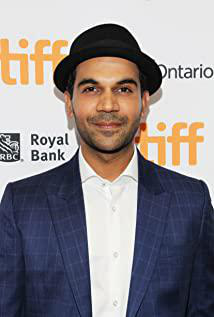

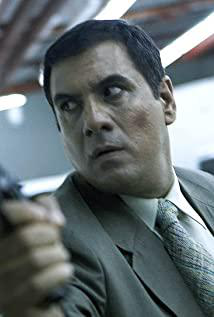

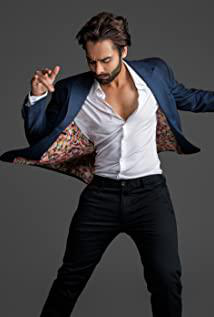

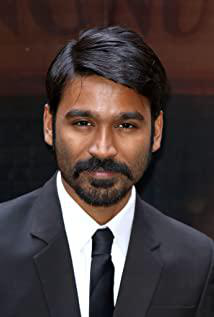

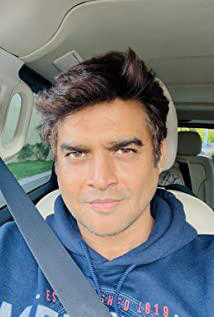

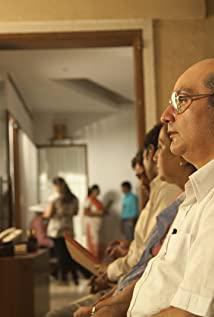

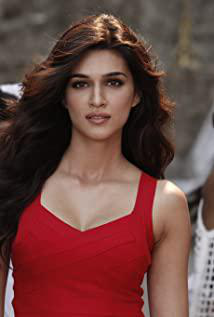

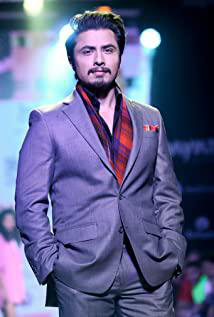

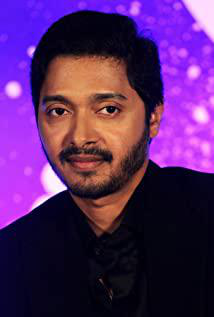

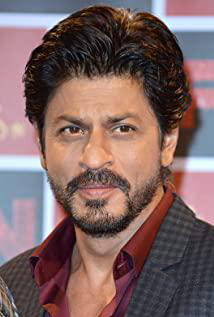

In [17]:
#helping function to look at images saved in "images directory"
from os import listdir
from PIL import Image as PImage

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

path = "/content/images/full/"

# your images in an array
imgs = loadImages(path)

for i in range(10):
    # you can show every image
    display(imgs[i])

loading the csv data collected into a database

In [18]:
!sudo apt install mysql-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libencode-locale-perl libevent-core-2.1-6
  libfcgi-perl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl
  libhttp-date-perl libhttp-message-perl libio-html-perl
  liblwp-mediatypes-perl libtimedate-perl liburi-perl mysql-client-5.7
  mysql-client-core-5.7 mysql-server-5.7 mysql-server-core-5.7 psmisc
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libwww-perl mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libencode-locale-perl libevent-core-2.1-6
  libfcgi-perl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl
  libhttp-date-perl libhttp-message-perl libio-html-perl
  liblwp-mediatypes-perl libtimedate-perl liburi-perl mysql-client-5.7
  mysql-client-core-5.7 mysql-server mysql-server-5.7 mysql-server-core-5.7
  psmisc

In [19]:
!pip install pymysql
!sudo service mysql start

     |████████████████████████████████| 51kB 1.7MB/s 
 * Starting MySQL database server mysqld
No directory, logging in with HOME=/
   ...done.


In [20]:
!sudo mysql -u root
#type these commands in mysql database if "access is denied"
#create database test;USE mysql;UPDATE user SET plugin='mysql_native_password' WHERE User='root';FLUSH PRIVILEGES;exit;

Welcome to the MySQL monitor.  Commands end with ; or \g.
Your MySQL connection id is 4
Server version: 5.7.29-0ubuntu0.18.04.1 (Ubuntu)

Copyright (c) 2000, 2020, Oracle and/or its affiliates. All rights reserved.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

mysql> create database test;USE mysql;UPDATE user SET plugin='mysql_native_passw ord' WHERE User='root';FLUSH PRIVILEGES;exit;
Query OK, 1 row affected (0.00 sec)

Reading table information for completion of table and column names
You can turn off this feature to get a quicker startup with -A

Database changed
Query OK, 1 row affected (0.00 sec)
Rows matched: 1  Changed: 1  Warnings: 0

Query OK, 0 rows affected (0.00 sec)

Bye


In [21]:
#exporting pandas DataFrame into sql table
from sqlalchemy import create_engine
import pymysql
tableName   = "celeb_data"

sqlEngine = create_engine('mysql+pymysql://root:@127.0.0.1/test', pool_recycle=3600)
dbConnection = sqlEngine.connect()

try:
    frame = celeb_data.to_sql(tableName, dbConnection, if_exists='fail');
except ValueError as vx:
    print(vx)
except Exception as ex:   
    print(ex)
else:
    print("Table %s created successfully."%tableName);   
finally:
    dbConnection.close()

Table celeb_data created successfully.


In [22]:
sqlEngine       = create_engine('mysql+pymysql://root:@127.0.0.1', pool_recycle=3600)
dbConnection    = sqlEngine.connect()
frame           = pd.read_sql("select * from test.celeb_data where name='Sonakshi Sinha';", dbConnection);
display(frame)
dbConnection.close()

,index,name,main_profession,other_professions,alternate_name,other_works,publicity_listing,image_urls,images
0,65,Sonakshi Sinha,Actress,Costume and Wardrobe Department,Sonakshi Sharma,none,14 Magazine Cover Photos »,https://m.media-amazon.com/images/M/MV5BMTgxMT...,[{'url': 'https://m.media-amazon.com/images/M/...


In [27]:
display(frame['images'][0])
image = frame['images'][0]

"[{'url': 'https://m.media-amazon.com/images/M/MV5BMTgxMTUyNDg2NF5BMl5BanBnXkFtZTgwOTAyMTIzOTE@._V1_UY317_CR9,0,214,317_AL_.jpg', 'path': 'full/afb13be5be25f14ed9ddba27c27d4a91072e49f4.jpg', 'checksum': '1d52cfe52266cd5a0eb1249a80a8df96'}]"

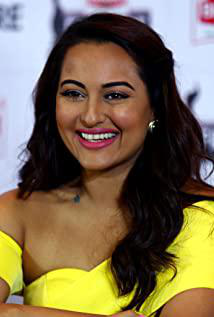

In [39]:
import re

pattern = re.compile(r"full.*jpg")
match = pattern.search(image)
path = match.group()

img = PImage.open('/content/images/'+path)
display(img)
